In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import decomposition

## Generate Dataset

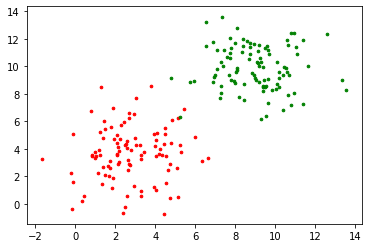

In [2]:
k = 2
n = 200
X = np.zeros((n, k))
Y = np.zeros((n, ))
mean = [3, 4]
cov = [[3, 0], [0, 4.5]]
mid = int(n / 2)
X[0:mid, :] = np.random.multivariate_normal(mean, cov, 100)
Y[0:mid] = 0
mean = [9, 10]
cov = [[3, 0], [0, 3]]
X[mid:, :] = np.random.multivariate_normal(mean, cov, 100)
Y[mid:] = 1

# shuffle
rand_idx = np.arange(n)

np.random.shuffle(rand_idx)
X = X[rand_idx,:]
Y = Y[rand_idx]


fig, ax = plt.subplots()
colors = ["r", "g", "b", "y", "c", "m"]
for i in range(k):
    X_cur = X[Y==i,:]
    ax.scatter(X_cur[:, 0], X_cur[:, 1], s=7, c=colors[i])
plt.show()

## Data Normalization

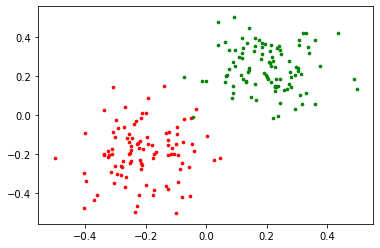

In [3]:
X_max = np.max(X, axis = 0)
X_min = np.min(X, axis = 0)
X = (X - X_min) / (X_max - X_min) - 0.5

fig, ax = plt.subplots()
colors = ["r", "g", "b", "y", "c", "m"]
for i in range(k):
    X_cur = X[Y==i,:]
    ax.scatter(X_cur[:, 0], X_cur[:, 1], s=7, c=colors[i])
plt.show()

## Built-in Function for PCA

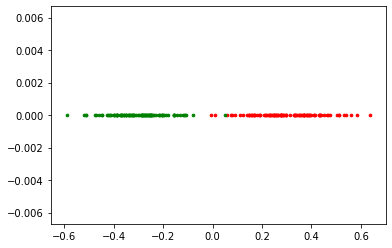

In [4]:
sklearn_pca = decomposition.PCA(n_components=1)
X_pca_sklearn = sklearn_pca.fit_transform(X)

fig, ax = plt.subplots()
colors = ["r", "g", "b", "y", "c", "m"]
for i in range(k):
    X_cur = X_pca_sklearn[Y == i, :]
    y1 = np.zeros((X_cur.shape[0], 1))
    ax.scatter(X_cur[:, 0], y1, s=7, c=colors[i])
plt.show()

## PCA step by step

In [5]:
X_mean = np.mean(X, axis = 0)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0] - 1)

u,s,v = np.linalg.svd(X.T)
print(u)
print(s)

[[-0.66517944 -0.74668354]
 [-0.74668354  0.66517944]]
[4.54844858 1.6201173 ]


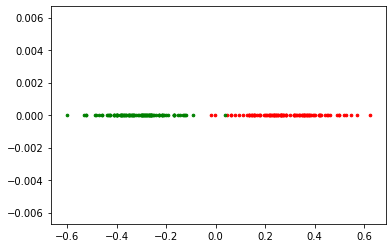

In [6]:
X_pca = np.reshape(u[0, :].dot(X.T).T, (n, 1))
# print(X_pca.shape)
fig, ax = plt.subplots()
colors = ["r", "g", "b", "y", "c", "m"]
for i in range(k):
    X_cur = X_pca[Y == i, :]
    y1 = np.zeros((X_cur.shape[0], 1))
    ax.scatter(X_cur[:, 0], y1, s=7, c=colors[i])
plt.show()